<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/07_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:

X1 = 'Course'
Y1 = 'GDP'
useColumns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

In [89]:
import pandas as pd

home_data = pd.read_csv('dataAlter.csv')
home_data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [27]:
print(X1)

Application order


<Axes: xlabel='Course', ylabel='GDP'>

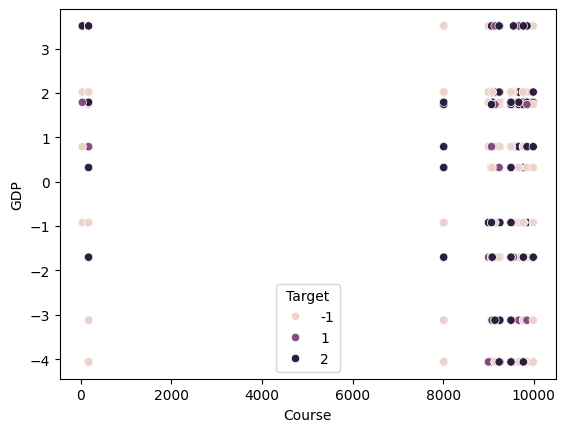

In [41]:
import seaborn as sns

sns.scatterplot(data = home_data, x = X1 , y = Y1, hue = 'Target')

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[useColumns], home_data[['Target']], test_size=0.33, random_state=0)

In [73]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [78]:
from sklearn.datasets import load_iris # Dataset
from sklearn.decomposition import PCA # Algorithm
import matplotlib.pyplot as plt # Visualization

In [102]:
features = ['Marital status','Application mode','Application order','Course','Daytime/evening attendance	','Previous qualification',
                'Previous qualification (grade)','Nacionality',"Mother's qualification","Father's qualification","Mother's occupation",
                "Father's occupation",'Admission grade','Displaced','Educational special needs','Debtor','Tuition fees up to date',
                'Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
                'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']
target = 'Target'

In [101]:
# Separating out the features
x = home_data.loc[:, features].values

    # Separating out the target
y = home_data.loc[:,[target]].values

In [103]:

def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n")


def VisualizePcaProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 component PCA', fontsize = 20)
    targets = ["Dropout", "Enrolled","Graduate" ]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   finalDf.loc[indicesToKeep, 'principal component 3'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

Explained variance per component:
[0.16217406303132575, 0.12121721914333755, 0.0936049031943397]



Dataframe PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  4424 non-null   float64
 1   principal component 2  4424 non-null   float64
 2   principal component 3  4424 non-null   float64
 3   Target                 4424 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 138.4 KB
None
       principal component 1  principal component 2  principal component 3  \
count            4424.000000           4.424000e+03           4.424000e+03   
mean                0.000000           4.818328e-17          -9.636656e-18   
std                 0.588102           5.084447e-01           4.467977e-01   
min                -1.060348          -1.351143e+00          -1.189756e+00   
25%                -

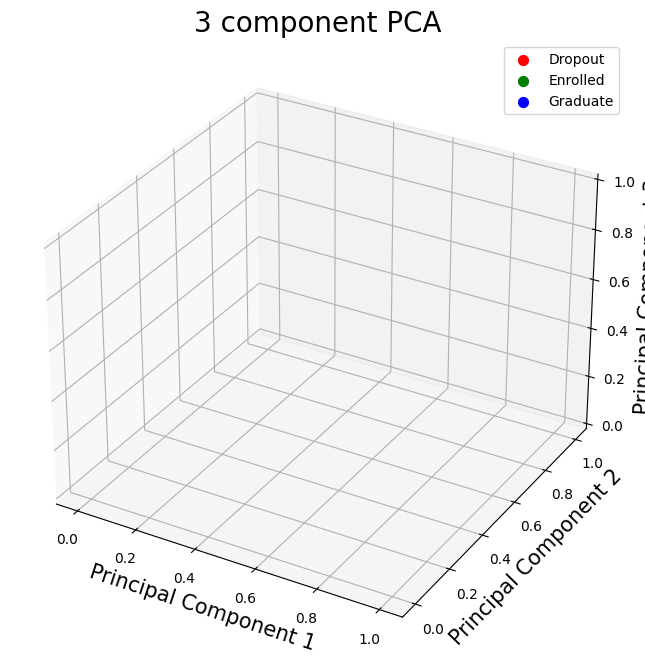

In [110]:
from sklearn.preprocessing import MinMaxScaler

x = MinMaxScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, home_data[[target]]], axis = 1)
# ShowInformationDataFrame(normalizedDf,"Dataframe Min-Max Normalized")

 # PCA projection
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

    # --------------------------------------------------- 3D

principalDf = pd.DataFrame(data = principalComponents[:,0:3],
                               columns = ['principal component 1',
                                          'principal component 2',
                                          'principal component 3'])

finalDf = pd.concat([principalDf, home_data[[target]]], axis = 1)
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)

<Axes: xlabel='Course', ylabel='GDP'>

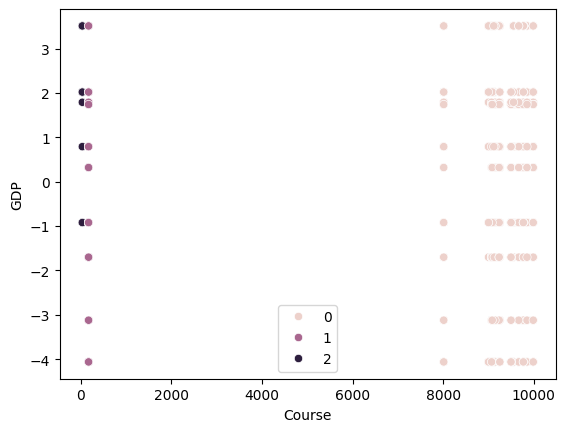

In [75]:
sns.scatterplot(data = X_train, x = X1, y = Y1, hue = kmeans.labels_)

<Axes: ylabel='Target'>

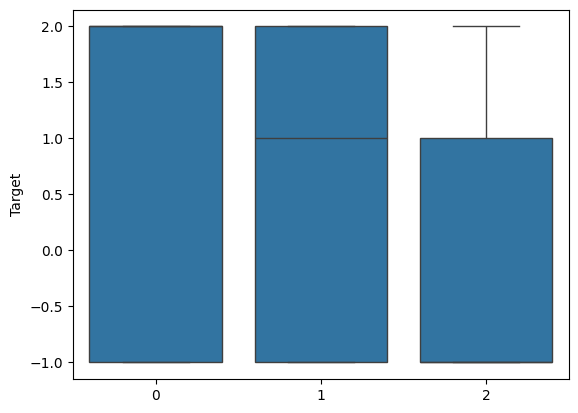

In [76]:
sns.boxplot(x = kmeans.labels_, y = y_train['Target'])

In [77]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.9742271227403609